## Full example. Titanic dataset

### Your first goal always should be getting a generalized prediction as fast as possible.
- This doesn't mean to skip exploratory data analysis (EDA). It just means not get caught up on it. Initially do only what is needed to get a generalized prediction.
- Getting a prediction first lets you set a benchmark for yourself. As you make improvements to the model, you should be able to see your desired error metric improve.

In [57]:
# With the goal above. I will import just what I need.
# The model to use (I already imported it above, but will do it again here so each example is self-contained)
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,GradientBoostingClassifier

# The error metric. In this case, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# An efficient data structure.
import pandas as pd

%matplotlib inline

# Import the data
X = pd.read_csv('../input/train.csv')
y = X.pop("Survived")
X_test = pd.read_csv('../input/test.csv')

In [58]:
X.describe()

/Users/tedrand/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
# Impute Age with mean to fix error
X["Age"].fillna(X.Age.mean(), inplace=True)
X_test["Age"].fillna(X.Age.mean(), inplace=True)
X_test["Fare"].fillna(X.Fare.median(), inplace=True)
X["Embarked"].fillna("S", inplace=True)
# Confirm the code is correct
# X.describe()
X_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.154603,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.636666,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [60]:
# Get just the numeric variables by selecting only the variables that are not 
# "object" datatypes.
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


I notice PassengerId looks like a worthless variable. I leave it in for two reasons. First, I don't want to go through the effort of dropping it (although that would be very easy). Second, I am interested in seeing if it is useful for prediction. It might be useful if the PassengerId was assigned in some non-random way. For example, perhaps PassengerId was assigned based on when the ticket was purchased in which case there might be something predictive about people who purchased their tickets early or late.

In [61]:
# Let's build our first model. I always have oob_score=True. It is a good
# idea to increase n_estimators higher than default.
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# I only use numeric_variables because I have yet to dummy out the categoricals
model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [62]:
# oob - out of bag
# gives the R^2 based on the oob predictions.
model.oob_score_

0.1361695005913669

In [63]:
y_oob = model.oob_prediction_
print("c - stat: ", roc_auc_score(y, y_oob))

c - stat:  0.73995515504


We now have a benchmark. This isn't very good for this dataset; however, it provides us a benchmark.

In [64]:
y_oob

array([ 0.71111111,  0.72413793,  0.02325581,  0.47368421,  0.16666667,
        0.34146341,  0.64705882,  0.17647059,  0.52777778,  0.75609756,
        0.72222222,  0.29411765,  0.38709677,  0.625     ,  0.87096774,
        0.46875   ,  0.04444444,  0.78571429,  0.41304348,  0.24242424,
        0.88571429,  0.64102564,  0.35897436,  0.5       ,  0.27777778,
        0.05128205,  0.88636364,  0.71428571,  0.46875   ,  0.36842105,
        0.47368421,  0.23684211,  0.84090909,  0.67647059,  0.82051282,
        0.475     ,  0.33333333,  0.225     ,  0.18421053,  0.53191489,
        0.275     ,  0.57777778,  0.11904762,  0.90625   ,  0.36363636,
        0.0625    ,  0.61764706,  0.62162162,  0.44186047,  0.16129032,
        0.25      ,  0.70833333,  0.25      ,  0.61290323,  0.36363636,
        0.4       ,  0.66666667,  0.5       ,  1.        ,  0.13157895,
        0.33333333,  0.2       ,  0.76923077,  0.21428571,  0.5       ,
        0.25      ,  0.36842105,  0.33333333,  0.4516129 ,  0.10

In [65]:
# Here is a simple function to show the descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [66]:
describe_categorical(X)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Todoroff, Mr. Lalio",male,347082,G6,S
freq,1,577,7,4,646


In [67]:
# Drop the variables I don't feel like dealing with for this tutorial
X.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)
X_test.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [68]:
# Change the Cabin variable to be only the first letter or None
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
    
X["Cabin"] = X.Cabin.apply(clean_cabin)
X_test["Cabin"] = X_test.Cabin.apply(clean_cabin)

In [69]:
categorical_variables = ['Sex', 'Cabin', 'Embarked']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    X_test[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    test_dummies = pd.get_dummies(X_test[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X_test = pd.concat([X_test, test_dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)
    X_test.drop([variable], axis=1, inplace=True)

In [70]:
# Look at all the columns in the dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
887,1,19.000000,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,3,29.699118,1,2,23.4500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,1,26.000000,0,0,30.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print("C - Stat: ", roc_auc_score(y, model.oob_prediction_))

C - Stat:  0.862170986057


This is a pretty good model. Now, before we try some different parameters for the model, let's use the Random Forest to help us with some EDA.

### Variable importance measures

In [44]:
model.feature_importances_

array([  9.13644480e-02,   2.39541753e-01,   4.48899203e-02,
         2.10987637e-02,   2.15606248e-01,   1.53597231e-01,
         1.48648645e-01,   2.56421421e-03,   3.56606004e-03,
         5.78539264e-03,   4.41049175e-03,   8.33574262e-03,
         8.64324447e-04,   8.98248435e-04,   2.72543592e-02,
         1.57969844e-04,   1.02670240e-02,   5.91355066e-03,
         1.52356128e-02])

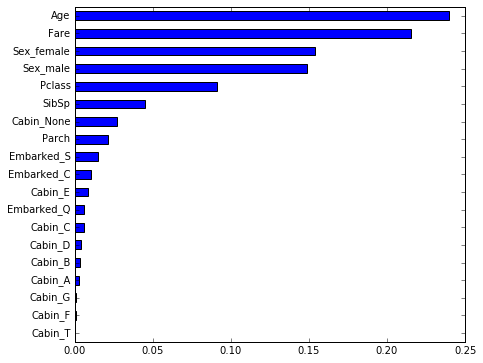

In [45]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));

## Parameter tests

Parameters to test

### - Parameters that will make your model better
    - <b>n_estimators</b>: The number of trees in the forest. Choose as high of a number your computer can handle.
    - <b>max_features</b>: The number of features to consider when looking for the best split
    - <b>min_samples_leaf</b>: The minimum number of samples in newly created leaves. Try [1,2,3]. If 3 is the best, try higher numbers such as 1 through 10.

### - Parameters that will make it easier to train your model
    - <b>n_jobs</b>: Determines iff multiple processors should be used to train and test the model. Always set this to -1 and %%timeit vs. if it is set to 1. It should be much faster (especially when many trees are trained).

## n_jobs

In [46]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y)

1 loop, best of 3: 2.91 s per loop


In [23]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)

1 loop, best of 3: 2.2 s per loop


## n_estimators

30 trees
C-stat:  0.854152685904

50 trees
C-stat:  0.861747568679

100 trees
C-stat:  0.862170986057

200 trees
C-stat:  0.862490546342

500 trees
C-stat:  0.863238850009

1000 trees
C-stat:  0.863816721525

2000 trees
C-stat:  0.863640963368



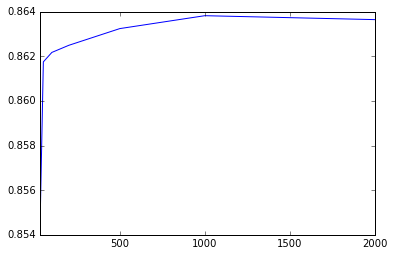

In [24]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print(trees, "trees")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: ", roc)
    results.append(roc)
    print("")
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.863816721525

None option
C-stat:  0.863816721525

sqrt option
C-stat:  0.863555747292

log2 option
C-stat:  0.863555747292

0.9 option
C-stat:  0.863955197648

0.2 option
C-stat:  0.86301515781



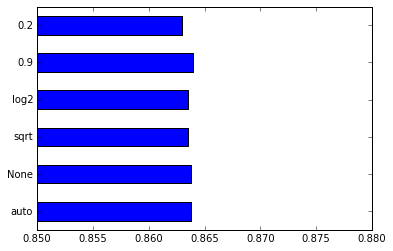

In [25]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print(max_features, "option")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: ", roc)
    results.append(roc)
    print("")
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

1 min samples
C-stat:  0.863816721525

2 min samples
C-stat:  0.869699293772

3 min samples
C-stat:  0.871430245316

4 min samples
C-stat:  0.873608581259

5 min samples
C-stat:  0.874290309867

6 min samples
C-stat:  0.873976075587

7 min samples
C-stat:  0.873267716955

8 min samples
C-stat:  0.871813717658

9 min samples
C-stat:  0.869251909373

10 min samples
C-stat:  0.867350525677



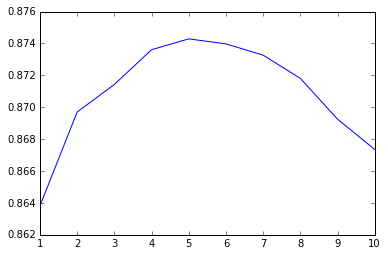

In [26]:
results = []
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9,10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000,
                                 oob_score=True,
                                 n_jobs=-1,
                                 random_state=42,
                                 max_features="auto",
                                 min_samples_leaf=min_samples)
    model.fit(X, y)
    print(min_samples,"min samples")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: ",roc)
    results.append(roc)
    print("")
    
pd.Series(results, min_samples_leaf_options).plot();

## Final model

In [72]:
X.drop(['Cabin_T'],inplace=True,axis=1)
# X.drop(['Cabin_None'],inplace=True,axis=1)

In [74]:
model = RandomForestRegressor(n_estimators=1000,
                             oob_score=True,
                             n_jobs=-1,
                             random_state=42,
                             max_features="auto",
                             min_samples_leaf=5)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print("C-stat: ",roc)

C-stat:  0.874386177952


In [98]:
params = {'n_estimators': 6000, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
model = GradientBoostingRegressor(**params)
model.fit(X, y)
acc = model.score(X, y)
print(acc)

0.825838102673


In [112]:
clf = GradientBoostingClassifier(random_state=1, 
                             n_estimators=950, 
                             min_samples_split=4, 
                             min_samples_leaf=1)
forst = clf.fit(X,y)
acc = forst.score(X, y)
print(acc)

0.977553310887


In [113]:
output = forst.predict(X_test).astype(int)

In [114]:
X.count()

Pclass        891
Age           891
SibSp         891
Parch         891
Fare          891
Sex_female    891
Sex_male      891
Cabin_A       891
Cabin_B       891
Cabin_C       891
Cabin_D       891
Cabin_E       891
Cabin_F       891
Cabin_G       891
Cabin_None    891
Embarked_C    891
Embarked_Q    891
Embarked_S    891
dtype: int64

In [115]:
X_test.count()

Pclass        418
Age           418
SibSp         418
Parch         418
Fare          418
Sex_female    418
Sex_male      418
Cabin_A       418
Cabin_B       418
Cabin_C       418
Cabin_D       418
Cabin_E       418
Cabin_F       418
Cabin_G       418
Cabin_None    418
Embarked_C    418
Embarked_Q    418
Embarked_S    418
dtype: int64

In [116]:
X_test_cp = pd.read_csv('../input/test.csv')
p_id = X_test_cp['PassengerId']
submission = pd.DataFrame({ 'PassengerId': p_id,
                            'Survived': output})
submission.to_csv("rand.csv", index=False)
print ("done")

done
